In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("Loan Prediction Dataset.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,913.000000,938.000000,938.000000,911.000000,918.000000,865.000000
mean,0.783133,5211.906183,1598.122516,143.162459,342.734205,0.833526
std,1.030808,5804.927551,2730.089846,78.318496,64.596771,0.372721
min,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2875.250000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3793.000000,1094.500000,127.000000,360.000000,1.000000
75%,2.000000,5531.500000,2366.500000,162.000000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        54
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       73
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.shape

(938, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            938 non-null    object 
 1   Gender             914 non-null    object 
 2   Married            935 non-null    object 
 3   Dependents         913 non-null    float64
 4   Education          938 non-null    object 
 5   Self_Employed      884 non-null    object 
 6   ApplicantIncome    938 non-null    int64  
 7   CoapplicantIncome  938 non-null    float64
 8   LoanAmount         911 non-null    float64
 9   Loan_Amount_Term   918 non-null    float64
 10  Credit_History     865 non-null    float64
 11  Property_Area      938 non-null    object 
 12  Loan_Status        938 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 95.4+ KB


In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,LP002781,Male,No,0.0,Graduate,No,3083,2738.0,120.0,360.0,1.0,Urban,N
934,LP002782,Male,Yes,1.0,Graduate,No,2667,1542.0,148.0,360.0,1.0,Rural,Y
935,LP002786,Female,Yes,0.0,Not Graduate,No,1647,1762.0,181.0,360.0,1.0,Urban,Y
936,LP002790,Male,Yes,3.0,Graduate,No,3400,0.0,80.0,120.0,1.0,Urban,N


In [11]:
#fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [12]:
#fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,143.162459,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,LP002781,Male,No,0.0,Graduate,No,3083,2738.0,120.000000,360.0,1.0,Urban,N
934,LP002782,Male,Yes,1.0,Graduate,No,2667,1542.0,148.000000,360.0,1.0,Rural,Y
935,LP002786,Female,Yes,0.0,Not Graduate,No,1647,1762.0,181.000000,360.0,1.0,Urban,Y
936,LP002790,Male,Yes,3.0,Graduate,No,3400,0.0,80.000000,120.0,1.0,Urban,N


In [14]:
df= df.drop(columns =['Loan_ID'],axis=1)

In [15]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     20
Credit_History       73
Property_Area         0
Loan_Status           0
dtype: int64

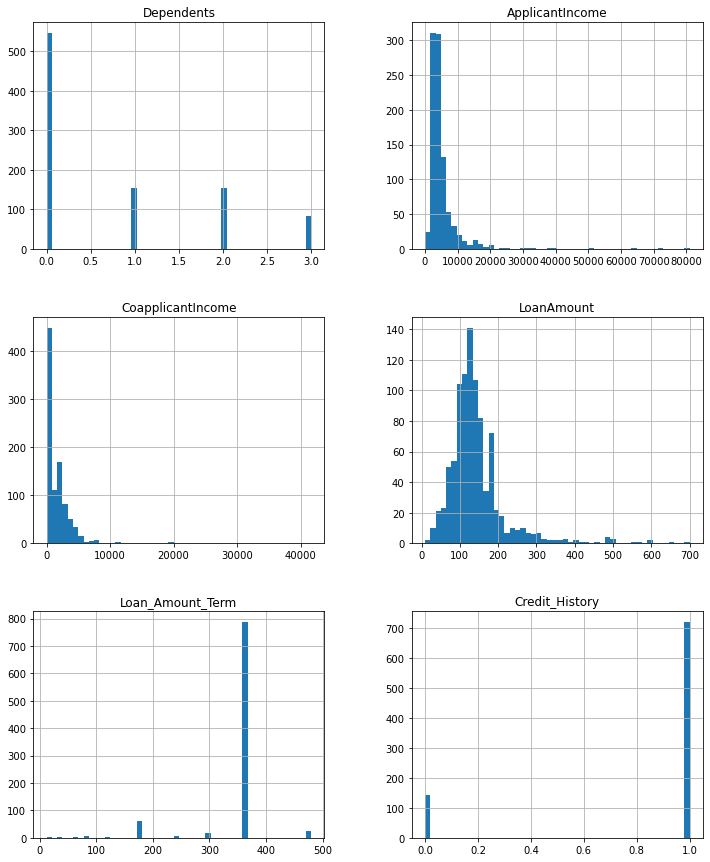

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12,15))
plt.show()

E:\11th semester\CSE445 (ITN)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Male      761
Female    177
Name: Gender, dtype: int64

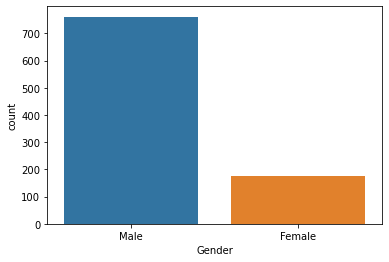

In [17]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()

E:\11th semester\CSE445 (ITN)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Yes    603
No     335
Name: Married, dtype: int64

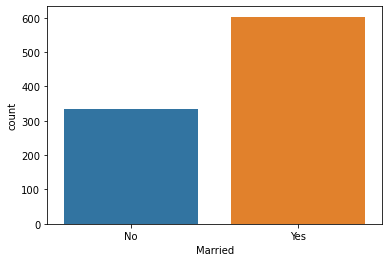

In [18]:
sns.countplot(df['Married'])
df['Married'].value_counts()

E:\11th semester\CSE445 (ITN)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    546
2.0    155
1.0    153
3.0     84
Name: Dependents, dtype: int64

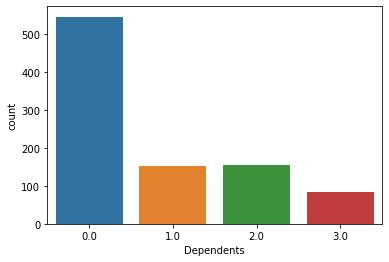

In [19]:
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

E:\11th semester\CSE445 (ITN)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Graduate        729
Not Graduate    209
Name: Education, dtype: int64

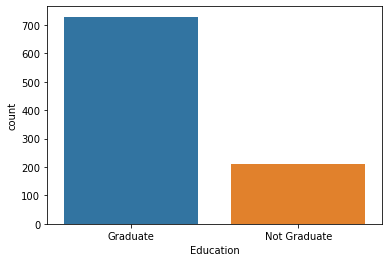

In [20]:
sns.countplot(df['Education'])
df['Education'].value_counts()

E:\11th semester\CSE445 (ITN)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No     826
Yes    112
Name: Self_Employed, dtype: int64

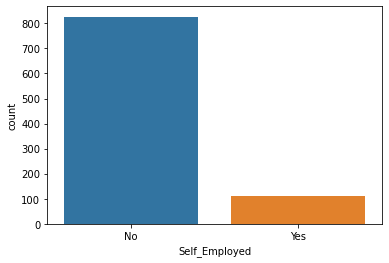

In [21]:
sns.countplot(df['Self_Employed'])
df['Self_Employed'].value_counts()

E:\11th semester\CSE445 (ITN)\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Y    607
N    331
Name: Loan_Status, dtype: int64

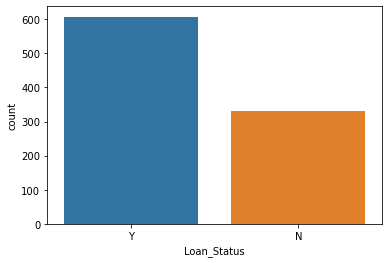

In [22]:
sns.countplot(df['Loan_Status'])
df['Loan_Status'].value_counts()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

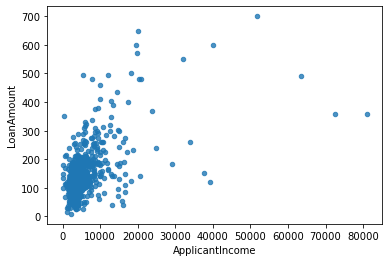

In [23]:
df.plot(kind="scatter", x="ApplicantIncome", y="LoanAmount", alpha=0.8)

<AxesSubplot:xlabel='Gender', ylabel='count'>

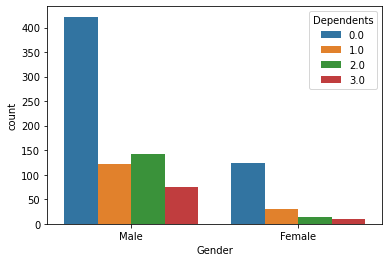

In [25]:
sns.countplot(x="Gender", hue="Dependents", data=df)

In [ ]:
sns.countplot(x="Gender", hue="Dependents", data=df)

<AxesSubplot:xlabel='Married', ylabel='count'>

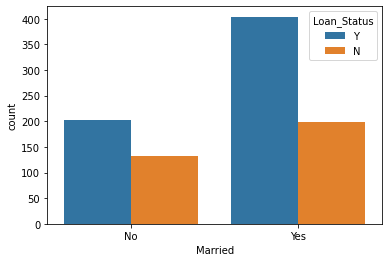

In [27]:
sns.countplot(x="Married", hue="Loan_Status", data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

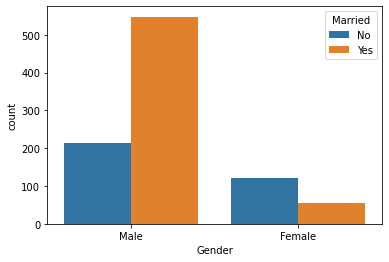

In [29]:
sns.countplot(x="Gender", hue="Married", data=df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

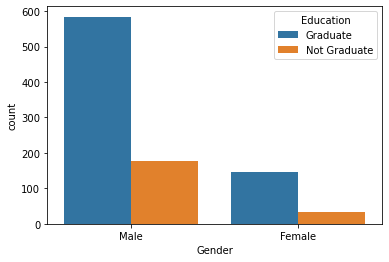

In [30]:
sns.countplot(x="Gender", hue="Education", data=df)

<AxesSubplot:xlabel='Education', ylabel='count'>

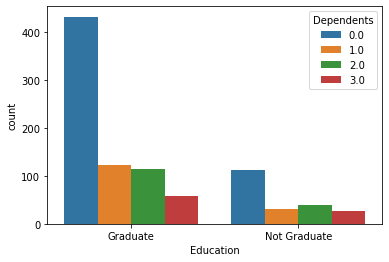

In [32]:
sns.countplot(x="Education", hue="Dependents", data=df)

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df

In [ ]:
#sns.barplot(x="Gender", y="Married", data=df)

In [ ]:
# df.replace({'Gender': {'Female':0, 'Male':1 }, 
#           'Married': {'No':0, 'Yes':1},
#           'Education': {'Not Graduate':0, 'Graduate':1},
#           'Self_Employed': {'No':0, 'Yes':1},
#           'Loan_Status': {'N':0, 'Y':1},
#           'Dependents': {'3+':3}},inplace= True)
# df

In [ ]:
sns.catplot(data=df, x="Gender", y="Loan_Status", hue="Gender")

In [ ]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True, cmap="BuPu")

## Stratified Sampling

In [ ]:
#specify input and output attributes
x = df.drop(columns =['Loan_Status'],axis=1)
y = df['Loan_Status']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
print(y_train.value_counts(normalize=True), '\n\n')

print(y_test.value_counts(normalize=True))

In [ ]:
sns.pairplot(df)

In [ ]:
sns.barplot(x = 'Married',y = 'LoanAmount',data = df)
 
plt.show()

In [ ]:
sns.barplot(x = 'Gender',
            y = 'ApplicantIncome',
            data = df,
            palette = "Blues")
 
plt.show()

In [ ]:
df.plot(kind = 'bar')

In [ ]:
# x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
# def classify(model, x ,y):
#     x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
#     model.fit(x_train,y_train)
#     print("Accuracy is", model.score(x_test,y_test)*100)
#     score = cross_val_score(model, x, y, cv=5)
#     print("Cross validation is,",np.mean(score)*100)

In [ ]:
# raw_data = pd.read_csv('Loan Prediction Dataset.csv')

# x = raw_data[[ 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Property_Area']]

# y = raw_data['Loan_Status']

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# model = LinearRegression()

# model.fit(x_train, y_train)

# print(model.coef_)

# print(model.intercept_)

# pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

# predictions = model.predict(x_test)

# # plt.scatter(y_test, predictions)

# plt.hist(y_test - predictions)

# metrics.mean_absolute_error(y_test, predictions)

# metrics.mean_squared_error(y_test, predictions)

# np.sqrt(metrics.mean_squared_error(y_test, predictions))

In [ ]:
# from sklearn import preprocessing
# x_array = np.array(df['LoanAmount'])
# normalized_arr = preprocessing.normalize([x_array])
# print(normalized_arr)

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df= scaler.fit_transform(df)


In [ ]:
df= pd.DataFrame(df, columns= ['Gender','Married','Dependents',
                               'Self_Employed','ApplicantIncome',
                               'CoapplicantIncome',
                               'Education','Property_Area',
                               'Loan_Status','LoanAmount' ])

In [ ]:
sns.pairplot(df)

In [ ]:
df.describe()

In [ ]:
df.plot(kind="scatter", x="ApplicantIncome", y="LoanAmount", alpha=0.8)

## Standarization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df= scaler.fit_transform(df)


In [ ]:
df= pd.DataFrame(df, columns= ['Gender','Married','Dependents',
                               'Self_Employed','ApplicantIncome',
                               'CoapplicantIncome',
                               'Education','Property_Area',
                               'Loan_Status','LoanAmount' ])

In [ ]:
sns.pairplot(df)

In [ ]:
df.describe()